<h1>SCVx Astrobee (official_template)</h1>

This template does not take in account time dilation.
$$
\renewcommand{\bm}[1]{\boldsymbol{#1}}
$$

Guidance problem to solve:

$$
\begin{align*}
    \text{min} \quad &\int_{0}^{t_f}||\bm{\tau}(t)||_2^2dt+\int_0^{t_f}||\bm{a}(t)||_2^2dt\\
    \text{s.t.}\quad&
        \dot{\bm{r}}=
        \bm{v}\\
        &\dot{\bm{v}}=
        \frac{1}{m}\bm{F}=\bm{a}\\
        &\dot{\bm{q}}=
        \frac{1}{2}\begin{bmatrix}
        0&-\omega_x&-\omega_y&-\omega_z\\
        \omega_x&0&\omega_z&-\omega_y\\
        \omega_y&-\omega_z&0&\omega_x\\
        \omega_z&\omega_y&-\omega_x&0
        \end{bmatrix}\bm{q}\\
        &\dot{\bm{\omega}}=
        \bm{I}^{-1}(-\bm{\omega}\times\bm{I}\bm{\omega}+\bm{\tau})\\
    &||\bm{r}-\bm{c}_1||\geq d_1,\quad||\bm{r}-\bm{c}_2||\geq d_2,\quad||\bm{r}-\bm{c}_3||\geq d_3\\
    &||\bm{v}||_2\leq v_{\text{max}}\\
    &||\bm{\omega}||_2\leq \omega_{\text{max}}\\
    &||\bm{a}||_1\leq a_{\text{max}}\\
    &||\bm{\tau}||_1\leq\tau_{\text{max}}\\
    &\bm{x}(0)=\bm{x}_0,\quad\bm{x}(t_f)=\bm{x}_{t_f}\\
    &\bm{v}(0)=\bm{v}_0,\quad\bm{v}(t_f)=\bm{v}_{t_f}\\
    &\bm{q}(0)=\bm{q}_0,\quad\bm{q}(t_f)=\bm{q}_{t_f}\\
    &\bm{w}(0)=\bm{w}_0,\quad\bm{\omega}(t_f)=\bm{\omega}_{t_f}
\end{align*}
$$

Given the scaling matrices and vectors $\bm{S}_x$, $\bm{S}_u$, $\bm{c}_x$, $\bm{c}_u$:

$$\hat{\bm{u}}=\begin{bmatrix}
\bm{a}\\
\bm{\tau}
\end{bmatrix},\quad\hat{\bm{u}}=\bm{S}_u\bm{u}+\bm{c}_u$$

$$\hat{\bm{x}}=\begin{bmatrix}
\bm{r}\\
\bm{v}\\
\bm{q}\\
\bm{\omega}
\end{bmatrix},\quad\hat{\bm{x}}=\bm{S}_x\bm{x}+\bm{c}_x$$

Where scaling matrices and vectors try to limit the optimization variables within $\bm{x}\in[0, 1]^n$, $\bm{u}\in[0, 1]^m$.

First, the original optimization problem is modeled as follows:
$$
\begin{align*}
    \text{min} \quad &J_\lambda(\bm{x},\bm{u},\bm{v}_c,\bm{v}_i)\\
    \text{s.t.}\quad&
        \dot{\hat{\bm{x}}}=
        \bm{f}(\hat{\bm{x}},\hat{\bm{u}})\\
    &\bm{g}(\hat{\bm{x}},\hat{\bm{u}})\leq \bm{0}\\
    &||\bm{x}-\bar{\bm{x}}||_\infty+||\bm{u}-\bar{\bm{u}}||_\infty\leq \eta\\
    &\hat{\bm{x}}\in\mathcal{X},\quad \hat{\bm{u}}\in\mathcal{U}
\end{align*}
$$
Where $\mathcal{X}$, $\mathcal{U}$ encompass convex restrictions.

Then, original optimization problem is transformed into (for instance, via 1st order Taylor's series):

$$
\begin{align*}
    \text{min} \quad &J_\lambda(\bm{x},\bm{u},\bm{v}_c,\bm{v}_i)\\
    \text{s.t.}\quad&
        \dot{\hat{\bm{x}}}=
        \hat{\bm{A}}(\hat{\bar{\bm{x}}},\hat{\bar{\bm{u}}})\hat{\bm{x}}+\hat{\bm{B}}(\hat{\bar{\bm{x}}},\hat{\bar{\bm{u}}})\hat{\bm{u}}+\hat{\bm{y}}(\hat{\bar{\bm{x}}},\hat{\bar{\bm{u}}})+\bm{v}_c\\
    &\hat{\bm{C}}(\hat{\bar{\bm{x}}},\hat{\bar{\bm{u}}})\hat{\bm{x}}+\hat{\bm{D}}(\hat{\bar{\bm{x}}},\hat{\bar{\bm{u}}})\hat{\bm{u}}+\hat{\bm{z}}(\hat{\bar{\bm{x}}},\hat{\bar{\bm{u}}})\leq \bm{v}_i\\
    &||\bm{x}-\bar{\bm{x}}||_\infty+||\bm{u}-\bar{\bm{u}}||_\infty\leq \eta\\
    &\hat{\bm{x}}\in\mathcal{X},\quad \hat{\bm{u}}\in\mathcal{U}
\end{align*}
$$

Defining:

$$
\begin{equation*}
\bm{A}=\bm{S}_x^{-1}\hat{\bm{A}}(\hat{\bar{\bm{x}}},\hat{\bar{\bm{u}}})\bm{S}_x,\quad \bm{B}=\bm{S}_x^{-1}\hat{\bm{B}}(\hat{\bar{\bm{x}}},\hat{\bar{\bm{u}}})\bm{S}_u
\end{equation*}
$$
$$
\begin{equation*}
\bm{y}=\bm{S}_x^{-1}\hat{\bm{A}}(\hat{\bar{\bm{x}}},\hat{\bar{\bm{u}}})\bm{c}_x+
\bm{S}_x^{-1}\hat{\bm{B}}(\hat{\bar{\bm{x}}},\hat{\bar{\bm{u}}})\bm{c}_u+
\bm{S}_x^{-1}\hat{\bm{y}}(\hat{\bar{\bm{x}}},\hat{\bar{\bm{u}}})
\end{equation*}
$$

$$
\begin{equation*}
\bm{C}=\hat{\bm{C}}(\hat{\bar{\bm{x}}},\hat{\bar{\bm{u}}})\bm{S}_x,\quad \bm{D}=\hat{\bm{D}}(\hat{\bar{\bm{x}}},\hat{\bar{\bm{u}}})\bm{S}_u
\end{equation*}
$$
$$
\begin{equation*}
\bm{z}=\hat{\bm{C}}(\hat{\bar{\bm{x}}},\hat{\bar{\bm{u}}})\bm{c}_x+
\hat{\bm{D}}(\hat{\bar{\bm{x}}},\hat{\bar{\bm{u}}})\bm{c}_u+
\hat{\bm{z}}(\hat{\bar{\bm{x}}},\hat{\bar{\bm{u}}})
\end{equation*}
$$

Some matrix algebra leads to the following optimization problem:
$$
\begin{align*}
    \text{min} \quad &J_\lambda(\bm{x},\bm{u},\bm{v}_c,\bm{v}_i)\\
    \text{s.t.}\quad&
        \dot{\bm{x}}=
        \bm{A}\bm{x}+\bm{B}\bm{u}+\bm{y}+\bm{v}_c\\
    &\bm{C}\bm{x}+\bm{D}\bm{u}+\bm{z}\leq \bm{v}_i\\
    &||\bm{x}-\bar{\bm{x}}||_\infty+||\bm{u}-\bar{\bm{u}}||_\infty\leq \eta\\
    &\bm{x}\in\mathcal{X},\quad \bm{u}\in\mathcal{U}
\end{align*}
$$

Then, through discretization techniques, we need to generate the SCVx convex optimization problem:

$$
\begin{align*}
    \text{min} \quad &\mathcal{L}_\lambda(\bm{x},\bm{u},\bm{v}_c,\bm{v}_i)\\
    \text{s.t.}\quad&
        \bm{x}_{k+1}=
        \bm{A}_k\bm{x}+\bm{B}_k\bm{u}_k+\bm{y}_k+\bm{v}_{c_k}\\
    &\bm{C}_{k}\bm{x}_{k}+\bm{D}_{k}\bm{u}_{k}+\bm{z}_{k}\leq \bm{v}_{i_k}\\
    &||\bm{x}_{k}-\bar{\bm{x}}_{k}||_1+||\bm{u}_{k}-\bar{\bm{u}}_{k}||_1\leq \eta\\
    &\bm{x}_k\in\mathcal{X}_k,\quad \bm{u}_k\in\mathcal{U}_k
\end{align*}
$$

This example denotes for instance (not always):
- $\hat{\bm{x}}$ as `x_no_discrete_no_scaled`.
- $\bm{x}$ as `x_no_discrete_scaled`
- $\bm{x}_k$ as `x_discrete_scaled`
- $\bar{\bm{x}}_k$ as `ox_discrete_scaled` (last generated trajectory)

Libraries:

In [1]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt
from scipy.spatial.transform import Rotation as R, Slerp
import time
import ecos
import math
import sympy as sp
import re

The user should input the mathematical optimization problem using Sympy (library for symbolic calculations):

In [2]:
ax, ay, az = sp.symbols('ax ay az')
taux, tauy, tauz = sp.symbols('taux tauy tauz')

t = sp.symbols('t')

rx, ry, rz = sp.symbols('rx ry rz')
vx, vy, vz = sp.symbols('vx vy vz')

q0, q1, q2, q3 = sp.symbols('q0 q1 q2 q3')
wx, wy, wz = sp.symbols('wx wy wz')

Ixx, Iyy, Izz = sp.symbols('Ixx Iyy Izz')
Ixy, Ixz, Iyz = sp.symbols('Ixy Ixz Iyz')

d_obs1, d_obs2, d_obs3 = sp.symbols('d_obs1 d_obs2 d_obs3')
c_obs1_x, c_obs1_y, c_obs1_z = sp.symbols('c_obs1_x c_obs1_y c_obs1_z')
c_obs2_x, c_obs2_y, c_obs2_z = sp.symbols('c_obs2_x c_obs2_y c_obs2_z')
c_obs3_x, c_obs3_y, c_obs3_z = sp.symbols('c_obs3_x c_obs3_y c_obs3_z')

# Rigid body kinematics
I = sp.Matrix([
    [Ixx, Ixy, Ixz],
    [Ixy, Iyy, Iyz],
    [Ixz, Iyz, Izz]
])

w_sympy = sp.Matrix([wx, wy, wz])
tau_sympy = sp.Matrix([taux, tauy, tauz])

f_ridig_body = I.inv() * (- w_sympy.cross(I*w_sympy) + tau_sympy)

f_ridig_body = sp.simplify(f_ridig_body)

f1 = vx
f2 = vy
f3 = vz
f4 = ax
f5 = ay
f6 = az
f7 = 0.5 * (-wx*q1-wy*q2-wz*q3)
f8 = 0.5 * (+wx*q0+wz*q2-wy*q3)
f9 = 0.5 * (+wy*q0-wz*q1+wx*q3)
f10 = 0.5 * (wz*q0+wy*q1-wx*q2)
f11 = f_ridig_body[0]
f12 = f_ridig_body[1]
f13 = f_ridig_body[2]

diff1 = sp.Matrix([rx, ry, rz])-sp.Matrix([c_obs1_x, c_obs1_y, c_obs1_z])
diff2 = sp.Matrix([rx, ry, rz])-sp.Matrix([c_obs2_x, c_obs2_y, c_obs2_z])
diff3 = sp.Matrix([rx, ry, rz])-sp.Matrix([c_obs3_x, c_obs3_y, c_obs3_z])

g1 = -sp.sqrt(diff1.dot(diff1))+d_obs1
g2 = -sp.sqrt(diff2.dot(diff2))+d_obs2
g3 = -sp.sqrt(diff3.dot(diff3))+d_obs3

f_orig_opt_prob=[f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13]
g_orig_opt_prob=[g1,g2,g3]

x_states = [rx,ry,rz,vx,vy,vz,q0,q1,q2,q3,wx,wy,wz]
u_input = [ax,ay,az,taux,tauy,tauz]

Compulsory: User also should input the following string vector

In [3]:
state_parameters_string = [
    "rx",
    "ry",
    "rz",
    "vx",
    "vy",
    "vz",
    "q0",
    "q1",
    "q2",
    "q3",
    "wx",
    "wy",
    "wz"
]

control_parameters_string = [
    "ax",
    "ay",
    "az",
    "taux",
    "tauy",
    "tauz"
]

time_string = [
    "t"
]

dynamic_parameters_string = [
    "Ixx",
    "Iyy",
    "Izz",
    "Ixy",
    "Ixz",
    "Iyz",
    "c_obs1_x",
    "c_obs1_y",
    "c_obs1_z",
    "c_obs2_x",
    "c_obs2_y",
    "c_obs2_z",
    "c_obs3_x",
    "c_obs3_y",
    "c_obs3_z",
    "d_obs1",
    "d_obs2",
    "d_obs3"
]

Automatically, Python functions are created to compute:




In [22]:
def replace_variables_in_string(f_str,
                                state_parameters_string,
                                control_parameters_string,
                                dynamic_parameters_string):

    # Replace states
    for i, var in enumerate(state_parameters_string):
        f_str = re.sub(rf"\b{var}\b", f"hx[{i},0]", f_str)

    # Replace inputs
    for i, var in enumerate(control_parameters_string):
        f_str = re.sub(rf"\b{var}\b", f"hu[{i},0]", f_str)

    # Replace problem parameters
    for i, var in enumerate(dynamic_parameters_string):
        f_str = re.sub(rf"\b{var}\b", f"dyn_par[{i}]", f_str)

    return f_str

def matrix_to_numpy_string(matrix, state_params, control_params, dynamic_params):
    """
    Converts a sympy symbolic matrix into a string representing a numpy.array,
    with optional variable replacement using replace_variables_in_string.

    Args:
        matrix: sympy.Matrix of any dimension.
        state_params, control_params, dynamic_params: strings for variable replacement.

    Returns:
        A string representing a numpy.array ready to be evaluated in Python.
    """

    n_rows, *rest = np.shape(matrix)
    n_cols = rest[0] if rest else 1
    
    matrix = sp.Matrix(n_rows, n_cols, lambda i, j: matrix[i*n_cols + j])

    array_str = "np.array([["

    for i in range(0,n_rows):
        for j in range(0,n_cols):
            array_str += sp.pycode(matrix[i, j])
            if j < n_cols - 1:
                array_str += ","
        if i < n_rows - 1:
            array_str += "],["
        else:
            array_str += "]])"

    # Apply variable replacement using your custom function
    array_str = replace_variables_in_string(array_str,
                                            state_params,
                                            control_params,
                                            dynamic_params)
    return array_str



#Automated Python script creation

#f, g
string_f_SCVx =string_f_SCVx=matrix_to_numpy_string(f_orig_opt_prob,
                                                    state_parameters_string,
                                                    control_parameters_string,
                                                    dynamic_parameters_string)
print("\nf_SCVx:\n")
print(string_f_SCVx)

string_g_SCVx =string_g_SCVx=matrix_to_numpy_string(g_orig_opt_prob,
                                                    state_parameters_string,
                                                    control_parameters_string,
                                                    dynamic_parameters_string)
print("\ng_SCVx:\n")
print(string_g_SCVx)

#A, B, y
A_symbolic = sp.Matrix(f_orig_opt_prob).jacobian(x_states) #Sympy Jacobian (Linearization via Taylor series)

string_A_SCVx =string_A_SCVx=matrix_to_numpy_string(A_symbolic,
                                                    state_parameters_string,
                                                    control_parameters_string,
                                                    dynamic_parameters_string)
print("\nA_no_discrete_no_scaled:\n")
print(string_A_SCVx)

B_symbolic = sp.Matrix(f_orig_opt_prob).jacobian(u_input) #Sympy Jacobian (Linearization via Taylor series)

string_B_SCVx =string_B_SCVx=matrix_to_numpy_string(B_symbolic,
                                                    state_parameters_string,
                                                    control_parameters_string,
                                                    dynamic_parameters_string)
print("\nB_no_discrete_no_scaled:\n")
print(string_B_SCVx)

y_symbolic = f_orig_opt_prob-A_symbolic@np.transpose(x_states)-B_symbolic@np.transpose(u_input) #Sympy Jacobian (Linearization via Taylor series)

string_y_SCVx =string_y_SCVx=matrix_to_numpy_string(y_symbolic,
                                                    state_parameters_string,
                                                    control_parameters_string,
                                                    dynamic_parameters_string)
print("\ny_no_discrete_no_scaled:\n")
print(string_y_SCVx)

#C, D, z
C_symbolic = sp.Matrix(g_orig_opt_prob).jacobian(x_states) #Sympy Jacobian (Linearization via Taylor series)

string_C_SCVx = matrix_to_numpy_string(C_symbolic,
                                        state_parameters_string,
                                        control_parameters_string,
                                        dynamic_parameters_string)
print("\nC_no_discrete_no_scaled:\n")
print(string_C_SCVx)

D_symbolic = sp.Matrix(g_orig_opt_prob).jacobian(u_input) #Sympy Jacobian (Linearization via Taylor series)

string_D_SCVx = matrix_to_numpy_string(D_symbolic,
                                        state_parameters_string,
                                        control_parameters_string,
                                        dynamic_parameters_string)
print("\nD_no_discrete_no_scaled:\n")
print(string_D_SCVx)

z_symbolic = g_orig_opt_prob-C_symbolic@np.transpose(x_states)-D_symbolic@np.transpose(u_input) #Sympy Jacobian (Linearization via Taylor series)

string_z_SCVx = matrix_to_numpy_string(z_symbolic,
                                        state_parameters_string,
                                        control_parameters_string,
                                        dynamic_parameters_string)
print("\nz_no_discrete_no_scaled:\n")
print(string_z_SCVx)

#Write f, g, A, y, C, D, z functions inside f_g_A_B_y_C_D_z_functions.py

filename = "f_g_A_B_y_C_D_z_functions.py"

file_content = f"""
import numpy as np
import math

def f_SCVx(hx, hu, t, dyn_par):
    return {string_f_SCVx}

def g_SCVx(hx, hu, t, dyn_par):
    return {string_g_SCVx}

def A_no_discrete_no_scaled_SCVx(hx, hu, t, dyn_par):
    return {string_A_SCVx}

def B_no_discrete_no_scaled_SCVx(hx, hu, t, dyn_par):
    return {string_B_SCVx}

def y_no_discrete_no_scaled_SCVx(hx, hu, t, dyn_par):
    return {string_y_SCVx}

def C_no_discrete_no_scaled_SCVx(hx, hu, t, dyn_par):
    return {string_C_SCVx}

def D_no_discrete_no_scaled_SCVx(hx, hu, t, dyn_par):
    return {string_D_SCVx}

def z_no_discrete_no_scaled_SCVx(hx, hu, t, dyn_par):
    return {string_z_SCVx}
"""
with open(filename, "w", encoding="utf-8") as f:
    f.write(file_content)
print("\nSymbolic algebra functions implemented!")


f_SCVx:

np.array([[hx[3,0]],[hx[4,0]],[hx[5,0]],[hu[0,0]],[hu[1,0]],[hu[2,0]],[-0.5*hx[7,0]*hx[10,0] - 0.5*hx[8,0]*hx[11,0] - 0.5*hx[9,0]*hx[12,0]],[0.5*hx[6,0]*hx[10,0] + 0.5*hx[8,0]*hx[12,0] - 0.5*hx[9,0]*hx[11,0]],[0.5*hx[6,0]*hx[11,0] - 0.5*hx[7,0]*hx[12,0] + 0.5*hx[9,0]*hx[10,0]],[0.5*hx[6,0]*hx[12,0] + 0.5*hx[7,0]*hx[11,0] - 0.5*hx[8,0]*hx[10,0]],[(-(dyn_par[3]*dyn_par[5] - dyn_par[4]*dyn_par[1])*(hu[5,0] - hx[10,0]*(dyn_par[3]*hx[10,0] + dyn_par[1]*hx[11,0] + dyn_par[5]*hx[12,0]) + hx[11,0]*(dyn_par[0]*hx[10,0] + dyn_par[3]*hx[11,0] + dyn_par[4]*hx[12,0])) + (dyn_par[3]*dyn_par[2] - dyn_par[4]*dyn_par[5])*(hu[4,0] + hx[10,0]*(dyn_par[4]*hx[10,0] + dyn_par[5]*hx[11,0] + dyn_par[2]*hx[12,0]) - hx[12,0]*(dyn_par[0]*hx[10,0] + dyn_par[3]*hx[11,0] + dyn_par[4]*hx[12,0])) - (dyn_par[1]*dyn_par[2] - dyn_par[5]**2)*(hu[3,0] - hx[11,0]*(dyn_par[4]*hx[10,0] + dyn_par[5]*hx[11,0] + dyn_par[2]*hx[12,0]) + hx[12,0]*(dyn_par[3]*hx[10,0] + dyn_par[1]*hx[11,0] + dyn_par[5]*hx[12,0])))/(-dyn_p

**RESTART THE KERNEL AND RUN FROM THE BEGINNING**!

In [23]:
from f_g_A_B_y_C_D_z_functions import *

User should input parameters (numerical):

In [24]:
T = 31-1 # 101-1 means 101 discretization points
tf = 200.0
tau_double = tf/(T) #step time
size_N=20 #discretization accuracy

start_r_xyz=np.array([[0.0],[-1.0],[1.0]])
end_r_xyz=np.array([[5.0],[2.0],[1.6]])

start_v_xyz=np.array([[0.001],[-0.002],[0.0]])
end_v_xyz=np.array([[0.0],[0.0],[0.0]])

start_quat=np.array([[0],[1],[0],[0]])
#end_quat=np.array([[0.5],[0.4],[0],[(1-0.5**2-0.4**2)**0.5]])
end_quat=np.array([[0],[0],[1],[0]])

start_w_xyz=np.array([[0.0],[0.0],[0.0]])
end_w_xyz=np.array([[0.0],[0.0],[0.0]])

start_pos_double=np.block([[start_r_xyz],[start_v_xyz],[start_quat],[start_w_xyz]])
end_pos_double=np.block([[end_r_xyz],[end_v_xyz],[end_quat],[end_w_xyz]])

c_obs1_double = np.array([[1.1],[-0.5],[1]]) #m
c_obs2_double = np.array([[2.6],[0.5],[1.1]]) #m
c_obs3_double = np.array([[4],[1.6],[1.2]]) #m

d_obs1_double = 0.8 #m
d_obs2_double = 0.8 #m
d_obs3_double = 0.8 #m

J1_double=0.1083 #Kg m^2
J2_double=0.1083 #Kg m^2
J3_double=0.1083 #Kg m^2

acc_max_double = 20/7.2*0.001 #m/s^2
torq_max_double = 100*0.000001 #Kg m^2/s^2

vel_max_double = 5.0 #m/s
omega_max_double = 5.0*np.pi/180 #rad/s


#Guidance parameters (COGU parameters)
rho0=0.0
rho1=0.1
rho2=0.7
etta0=0.00000001
etta1=10
beta_sh=2
beta_gr=2

lamb_double=1000
etta_double=1

e_tol=0.005
epsilon_stop_norm=0.00001

#scaling matrices and vectors
S_u_scaling_double=np.array([[2*(10*acc_max_double),0,0,0,0,0],
                      [0,2*(10*acc_max_double),0,0,0,0],
                      [0,0,2*(10*acc_max_double),0,0,0],
                      [0,0,0,2*(0.1*torq_max_double),0,0],
                      [0,0,0,0,2*(0.1*torq_max_double),0],
                      [0,0,0,0,0,2*(0.1*torq_max_double)],])
c_u_scaling_double=np.array([[-(10*acc_max_double)],
                      [-(10*acc_max_double)],
                      [-(10*acc_max_double)],
                      [-(0.1*torq_max_double)],
                      [-(0.1*torq_max_double)],
                      [-(0.1*torq_max_double)]])

S_x_scaling_double=np.array([[2*30,0,0,0,0,0,0,0,0,0,0,0,0],
                      [0,2*30,0,0,0,0,0,0,0,0,0,0,0],
                      [0,0,2*30,0,0,0,0,0,0,0,0,0,0],
                      [0,0,0,2*vel_max_double,0,0,0,0,0,0,0,0,0],
                      [0,0,0,0,2*vel_max_double,0,0,0,0,0,0,0,0],
                      [0,0,0,0,0,2*vel_max_double,0,0,0,0,0,0,0],
                      [0,0,0,0,0,0,2*1,0,0,0,0,0,0],
                      [0,0,0,0,0,0,0,2*1,0,0,0,0,0],
                      [0,0,0,0,0,0,0,0,2*1,0,0,0,0],
                      [0,0,0,0,0,0,0,0,0,2*1,0,0,0],
                      [0,0,0,0,0,0,0,0,0,0,2*omega_max_double,0,0],
                      [0,0,0,0,0,0,0,0,0,0,0,2*omega_max_double,0],
                      [0,0,0,0,0,0,0,0,0,0,0,0,2*omega_max_double]])
c_x_scaling_double=np.array([[-30],
                      [-30],
                      [-30],
                      [-vel_max_double],
                      [-vel_max_double],
                      [-vel_max_double],
                      [-1],
                      [-1],
                      [-1],
                      [-1],
                      [-omega_max_double],
                      [-omega_max_double],
                      [-omega_max_double]])

states_size = 13
inputs_size = 6
non_convex_inequalities_size = 3

Compulsory, input the following vector according to 'dynamic_parameters_string':

In [25]:
dynamic_parameters_double = [
    J1_double,
    J2_double,
    J3_double,
    0.01,
    0.02,
    0.01,
    c_obs1_double[0,0],
    c_obs1_double[1,0],
    c_obs1_double[2,0],
    c_obs2_double[0,0],
    c_obs2_double[1,0],
    c_obs2_double[2,0],
    c_obs3_double[0,0],
    c_obs3_double[1,0],
    c_obs3_double[2,0],
    d_obs1_double,
    d_obs2_double,
    d_obs3_double
]

**Warm starting**: The user should input this. In particular, this example uses:
- Slerp method to compute the initial quaternion sequence, then via Rigid body kinematics, the angular velocity sequence is computed. 
- Linear interpolation to compute the initial velocity sequence, then via discrete derivative, the velocity sequence is computed.

In [8]:
def slerp(q1, q2, num_samples):
    dot = np.dot(q1, q2)
    if dot < 0.0:
        q2 = -q2
        dot = -dot
    dot = np.clip(dot, -1.0, 1.0)
    theta_0 = np.arccos(dot)

    if np.abs(theta_0) < 1e-6:
        return np.linspace(q1, q2, num_samples)

    sin_theta_0 = np.sin(theta_0)

    quaternions = []
    for i in range(num_samples):
        t = i / (num_samples - 1)
        theta = theta_0 * t
        sin_theta = np.sin(theta)
        s0 = np.cos(theta) - dot * sin_theta / sin_theta_0
        s1 = sin_theta / sin_theta_0
        quaternions.append(s0 * q1 + s1 * q2)

    return np.array(quaternions)

def compute_angular_velocity(quaternions, dt):

    rotations = R.from_quat(quaternions)
    angular_velocities = [[0,0,0]]

    for i in range(len(rotations) - 1):
        delta_rot = rotations[i + 1] * rotations[i].inv()
        log_rot = delta_rot.as_rotvec() / dt
        angular_velocities.append(log_rot)

    return np.array(angular_velocities)

# Initial trajectory (without scaling)
ohx_pos = np.column_stack((np.array([np.linspace(start_pos_double[0,0], end_pos_double[0,0], T+1), np.linspace(start_pos_double[1,0], end_pos_double[1,0], T+1),np.linspace(start_pos_double[2,0], end_pos_double[2,0], T+1)]))).T
ohx_vel = np.zeros(np.shape(ohx_pos))

for t in range(1, T):
    ohx_vel[:, t] = (ohx_pos[:, t] - ohx_pos[:, t - 1])/tau_double

ohx_vel[:, 0:1] = start_pos_double[3:6,0:1]
ohx_vel[:, T:T+1] = end_pos_double[3:6,0:1]

ohx_quat = slerp(start_pos_double[6:10,0], end_pos_double[6:10,0],T+1).T
ohx_angvel = compute_angular_velocity(ohx_quat.T, tau_double).T

ohx=np.zeros((13,T+1))
ohx[0:6,:]=np.block([[ohx_pos],[ohx_vel]])
ohx[6:10,:]=ohx_quat
ohx[10:13,:]=ohx_angvel

ohu=np.zeros((6,T))

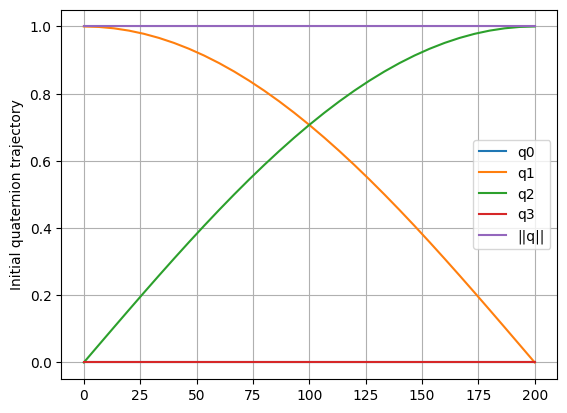

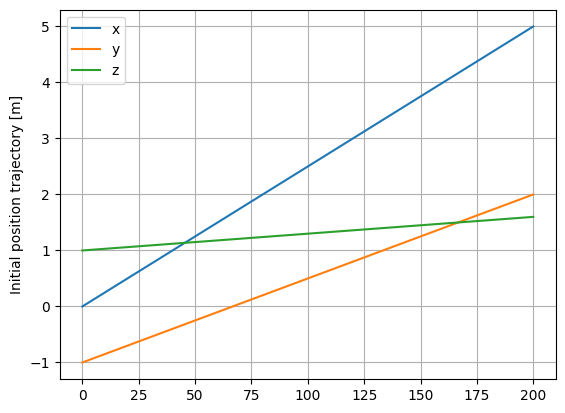

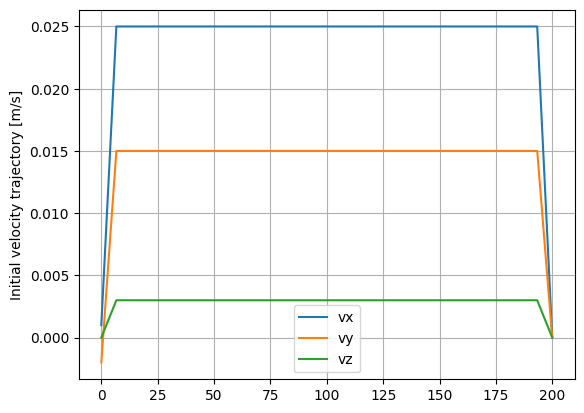

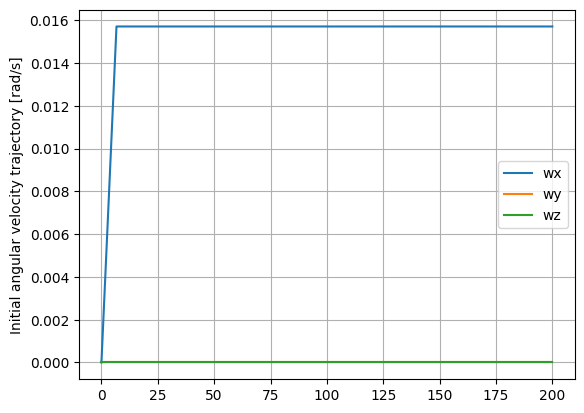

In [9]:
# Plot (scaled initial trajectories)

hu_value=np.copy(ohu)
hx_value=np.copy(ohx)

plt.figure(1)
plt.plot(np.linspace(0, tf, T+1), hx_value[6,:], label='q0')
plt.plot(np.linspace(0, tf, T+1), hx_value[7,:], label='q1')
plt.plot(np.linspace(0, tf, T+1), hx_value[8,:], label='q2')
plt.plot(np.linspace(0, tf, T+1), hx_value[9,:], label='q3')
plt.plot(np.linspace(0, tf, T+1), np.linalg.norm(hx_value[6:10,:],axis=0), label='||q||')
plt.ylabel('Initial quaternion trajectory')
plt.gca().tick_params(labelsize=10)
plt.legend()
plt.grid(True)

plt.figure(2)
plt.plot(np.linspace(0, tf, T+1), hx_value[0,:], label='x')
plt.plot(np.linspace(0, tf, T+1), hx_value[1,:], label='y')
plt.plot(np.linspace(0, tf, T+1), hx_value[2,:], label='z')

plt.ylabel('Initial position trajectory [m]')
plt.gca().tick_params(labelsize=10)
plt.legend()
plt.grid(True)

plt.figure(3)
plt.plot(np.linspace(0, tf, T+1), hx_value[3,:], label='vx')
plt.plot(np.linspace(0, tf, T+1), hx_value[4,:], label='vy')
plt.plot(np.linspace(0, tf, T+1), hx_value[5,:], label='vz')

plt.ylabel('Initial velocity trajectory [m/s]')
plt.gca().tick_params(labelsize=10)
plt.legend()
plt.grid(True)

plt.figure(4)
plt.plot(np.linspace(0, tf, T+1), hx_value[10,:], label='wx')
plt.plot(np.linspace(0, tf, T+1), hx_value[11,:], label='wy')
plt.plot(np.linspace(0, tf, T+1), hx_value[12,:], label='wz')

plt.ylabel('Initial angular velocity trajectory [rad/s]')
plt.gca().tick_params(labelsize=10)
plt.legend()
plt.grid(True)

CVXpy Optimization problem (DPP compliant for cvxpygen)

In [10]:
x = cp.Variable((states_size, T + 1), name='x')
u = cp.Variable((inputs_size, T), name='u')
vc = cp.Variable((states_size, T), name='vc')
vi = cp.Variable((non_convex_inequalities_size, T+1), name='vi')

A_discrete = cp.Parameter((states_size,states_size*T), name='A_discrete')
B_discrete = cp.Parameter((states_size,inputs_size*T), name='B_discrete')
y_discrete = cp.Parameter((states_size,1*T), name='y_discrete')

C_discrete = cp.Parameter((non_convex_inequalities_size,states_size*(T+1)), name='C_discrete')
D_discrete = cp.Parameter((non_convex_inequalities_size,inputs_size*(T+1)), name='D_discrete')
z_discrete = cp.Parameter((non_convex_inequalities_size,1*(T+1)), name='z_discrete')

tau = cp.Parameter(name='tau')
sqrt_tau = cp.Parameter(name='sqrt_tau')

start_pos = cp.Parameter((states_size,1), name='start_pos')
end_pos = cp.Parameter((states_size,1), name='end_pos')

ox_cvxpy = cp.Parameter((states_size,T + 1), name='ox_cvxpy')
ou_cvxpy = cp.Parameter((inputs_size,T), name='ou_cvxpy')

S_x_scaling = cp.Parameter((states_size,states_size), name='S_x_scaling')
S_u_scaling = cp.Parameter((inputs_size,inputs_size), name='S_u_scaling')

c_x_scaling = cp.Parameter((states_size,1), name='c_x_scaling')
c_u_scaling = cp.Parameter((inputs_size,1), name='c_u_scaling')

lamb = cp.Parameter(name='lamb')
tau_lamb = cp.Parameter(name='tau_lamb')
etta = cp.Parameter(name='etta')

vel_max = cp.Parameter(name='vel_max')
omega_max = cp.Parameter(name='omega_max')

acc_max = cp.Parameter(name='acc_max')
torq_max = cp.Parameter(name='torq_max')

constraints = [
    x[:, 0] == start_pos[:,0],
    x[:, T] == end_pos[:,0]
]

cost = 0

for k in range(0, T):
    cost += cp.sum_squares(sqrt_tau*u[0:3,k:k+1])
    cost += cp.sum_squares(sqrt_tau*u[3:6,k:k+1])
    cost += cp.norm(tau_lamb*vc[0:states_size, k:k+1],1)

for k in range(0, T+1):
    cost += cp.norm(tau_lamb*vi[0:non_convex_inequalities_size, k:k+1],1)

for k in range(0, T): # from 0 to T-1
    constraints += [x[0:states_size, k+1:k+2] == A_discrete[0:states_size,states_size*k:states_size*(k+1)] @ x[0:states_size, k:k+1] + B_discrete[0:states_size,inputs_size*k:inputs_size*(k+1)] @ u[0:inputs_size, k:k+1]+y_discrete[0:states_size, k:k+1]+vc[0:states_size, k:k+1]]

for k in range(0, T): # from 0 to T-1
    constraints += [C_discrete[0:non_convex_inequalities_size,states_size*k:states_size*(k+1)] @ x[0:states_size, k:k+1] + D_discrete[0:non_convex_inequalities_size,inputs_size*k:inputs_size*(k+1)] @ u[0:inputs_size, k:k+1]+z_discrete[0:non_convex_inequalities_size, k:k+1]<=vi[0:non_convex_inequalities_size, k:k+1]]
    constraints  += [cp.norm(x[0:states_size, k:k+1]-ox_cvxpy[0:states_size,k:k+1],'inf')+cp.norm(u[0:inputs_size, k:k+1]-ou_cvxpy[0:inputs_size,k:k+1],'inf')<=etta]

constraints += [C_discrete[0:non_convex_inequalities_size,states_size*T:states_size*(T+1)] @ x[0:states_size, T:T+1] + D_discrete[0:non_convex_inequalities_size,inputs_size*T:inputs_size*(T+1)] @ u[0:inputs_size, T-1:T]+z_discrete[0:non_convex_inequalities_size, T:T+1]<=vi[0:non_convex_inequalities_size, T:T+1]]
constraints  += [cp.norm(x[0:states_size, T:T+1]-ox_cvxpy[0:states_size,T:T+1],'inf')+cp.norm(u[0:inputs_size, T-1:T]-ou_cvxpy[0:inputs_size,T-1:T],'inf')<=etta]

# Convex constraints
for k in range(0, T+1): # from 0 to T
    constraints += [cp.norm(S_x_scaling[3:6,3:6]@x[3:6,k:k+1]+c_x_scaling[3:6,0:1], 2)<=vel_max]
    constraints += [cp.norm(S_x_scaling[10:13,10:13]@x[10:13,k:k+1]+c_x_scaling[10:13,0:1], 2)<=omega_max]
for k in range(0, T): # from 0 to T-1
    constraints += [cp.norm(S_u_scaling[0:3,0:3]@u[0:3,k:k+1]+c_u_scaling[0:3,0:1], 1)<=acc_max]
    constraints += [cp.norm(S_u_scaling[3:6,3:6]@u[3:6,k:k+1]+c_u_scaling[3:6,0:1], 1)<=torq_max]

objective = cp.Minimize(cost)
problem = cp.Problem(objective, constraints)

COMPULSORY: The problem needs to be DPP compliant for CVXpygen

In [11]:
print("Is DPP? ", problem.is_dcp(dpp=True))

Is DPP?  True


In [12]:
aux_A_discrete = np.zeros((states_size,states_size*T))
aux_B_discrete = np.zeros((states_size,inputs_size*T))
aux_y_discrete = np.zeros((states_size,1*T))

aux_C_discrete = np.zeros((non_convex_inequalities_size,states_size*(T+1)))
aux_D_discrete = np.zeros((non_convex_inequalities_size,inputs_size*(T+1)))
aux_z_discrete = np.zeros((non_convex_inequalities_size,1*(T+1)))

In [13]:
def SCVx_scaling_x(x_no_scaled,S_x_scaling_double,c_x_scaling_double):
    x_scaled = np.linalg.inv(S_x_scaling_double)@(x_no_scaled-c_x_scaling_double)
    return x_scaled
    
def SCVx_scaling_u(u_no_scaled,S_u_scaling_double,c_u_scaling_double):
    u_scaled = np.linalg.inv(S_u_scaling_double)@(u_no_scaled-c_u_scaling_double)
    return u_scaled

def SCVx_inv_scaling_x(x_scaled,S_x_scaling_double,c_x_scaling_double):
    x_inv_scaling = S_x_scaling_double@x_scaled+c_x_scaling_double
    return x_inv_scaling
    
def SCVx_inv_scaling_u(u_scaled,S_u_scaling_double,c_u_scaling_double):
    u_inv_scaling = S_u_scaling_double@u_scaled+c_u_scaling_double
    return u_inv_scaling


def A_no_discrete_scaled_SCVx(A_no_discrete_no_scaled, S_x_scaling_double):

    A_numeric = np.linalg.inv(S_x_scaling_double)@A_no_discrete_no_scaled@S_x_scaling_double

    return A_numeric

def B_no_discrete_scaled_SCVx(B_no_discrete_no_scaled, S_x_scaling_double, S_u_scaling_double):

    B_numeric = np.linalg.inv(S_x_scaling_double)@B_no_discrete_no_scaled@S_u_scaling_double

    return B_numeric

def y_no_discrete_scaled_SCVx(A_no_discrete_no_scaled,
                              B_no_discrete_no_scaled,
                              y_no_discrete_no_scaled,
                              S_u_scaling_double, S_x_scaling_double, c_x_scaling_double, c_u_scaling_double):

    y_numeric = np.linalg.inv(S_x_scaling_double)@A_no_discrete_no_scaled@c_x_scaling_double
    y_numeric = y_numeric+np.linalg.inv(S_x_scaling_double)@B_no_discrete_no_scaled@c_u_scaling_double
    y_numeric = y_numeric+np.linalg.inv(S_x_scaling_double)@y_no_discrete_no_scaled

    return y_numeric
    
def A_B_y_discrete_scaled(ox, ou, t0, dynamic_parameters_double, tau_double,
                          S_x_scaling_double, c_x_scaling_double,
                          S_u_scaling_double, c_u_scaling_double, size_N):
    
    ohx = SCVx_inv_scaling_x(ox, S_x_scaling_double, c_x_scaling_double)
    ohu = SCVx_inv_scaling_u(ou, S_u_scaling_double, c_u_scaling_double)

    n = len(ohx)
    m = len(ohu)

    Phi = np.eye(n)
    G   = np.zeros((n, m))
    z   = np.zeros((n, 1))

    dt = tau_double / (size_N - 1)
    t  = t0

    for i in range(size_N - 1):

        # ===== k1 =====
        A1_no = A_no_discrete_no_scaled_SCVx(ohx, ohu, t, dynamic_parameters_double)
        B1_no = B_no_discrete_no_scaled_SCVx(ohx, ohu, t, dynamic_parameters_double)
        y1_no = y_no_discrete_no_scaled_SCVx(ohx, ohu, t, dynamic_parameters_double)

        A1 = A_no_discrete_scaled_SCVx(A1_no, S_x_scaling_double)
        B1 = B_no_discrete_scaled_SCVx(B1_no, S_x_scaling_double, S_u_scaling_double)
        y1 = y_no_discrete_scaled_SCVx(A1_no, B1_no, y1_no,
                                       S_u_scaling_double,
                                       S_x_scaling_double,
                                       c_x_scaling_double,
                                       c_u_scaling_double)

        k1_Phi = A1 @ Phi
        k1_G   = A1 @ G + B1
        k1_z   = A1 @ z + y1

        # ===== k2 =====
        t2 = t + 0.5*dt
        Phi2 = Phi + 0.5*dt*k1_Phi
        G2   = G   + 0.5*dt*k1_G
        z2   = z   + 0.5*dt*k1_z

        A2_no = A_no_discrete_no_scaled_SCVx(ohx, ohu, t2, dynamic_parameters_double)
        B2_no = B_no_discrete_no_scaled_SCVx(ohx, ohu, t2, dynamic_parameters_double)
        y2_no = y_no_discrete_no_scaled_SCVx(ohx, ohu, t2, dynamic_parameters_double)

        A2 = A_no_discrete_scaled_SCVx(A2_no, S_x_scaling_double)
        B2 = B_no_discrete_scaled_SCVx(B2_no, S_x_scaling_double, S_u_scaling_double)
        y2 = y_no_discrete_scaled_SCVx(A2_no, B2_no, y2_no,
                                       S_u_scaling_double,
                                       S_x_scaling_double,
                                       c_x_scaling_double,
                                       c_u_scaling_double)

        k2_Phi = A2 @ Phi2
        k2_G   = A2 @ G2 + B2
        k2_z   = A2 @ z2 + y2

        # ===== k3 =====
        Phi3 = Phi + 0.5*dt*k2_Phi
        G3   = G   + 0.5*dt*k2_G
        z3   = z   + 0.5*dt*k2_z

        A3_no = A_no_discrete_no_scaled_SCVx(ohx, ohu, t2, dynamic_parameters_double)
        B3_no = B_no_discrete_no_scaled_SCVx(ohx, ohu, t2, dynamic_parameters_double)
        y3_no = y_no_discrete_no_scaled_SCVx(ohx, ohu, t2, dynamic_parameters_double)

        A3 = A_no_discrete_scaled_SCVx(A3_no, S_x_scaling_double)
        B3 = B_no_discrete_scaled_SCVx(B3_no, S_x_scaling_double, S_u_scaling_double)
        y3 = y_no_discrete_scaled_SCVx(A3_no, B3_no, y3_no,
                                       S_u_scaling_double,
                                       S_x_scaling_double,
                                       c_x_scaling_double,
                                       c_u_scaling_double)

        k3_Phi = A3 @ Phi3
        k3_G   = A3 @ G3 + B3
        k3_z   = A3 @ z3 + y3

        # ===== k4 =====
        t4 = t + dt
        Phi4 = Phi + dt*k3_Phi
        G4   = G   + dt*k3_G
        z4   = z   + dt*k3_z

        A4_no = A_no_discrete_no_scaled_SCVx(ohx, ohu, t4, dynamic_parameters_double)
        B4_no = B_no_discrete_no_scaled_SCVx(ohx, ohu, t4, dynamic_parameters_double)
        y4_no = y_no_discrete_no_scaled_SCVx(ohx, ohu, t4, dynamic_parameters_double)

        A4 = A_no_discrete_scaled_SCVx(A4_no, S_x_scaling_double)
        B4 = B_no_discrete_scaled_SCVx(B4_no, S_x_scaling_double, S_u_scaling_double)
        y4 = y_no_discrete_scaled_SCVx(A4_no, B4_no, y4_no,
                                       S_u_scaling_double,
                                       S_x_scaling_double,
                                       c_x_scaling_double,
                                       c_u_scaling_double)

        k4_Phi = A4 @ Phi4
        k4_G   = A4 @ G4 + B4
        k4_z   = A4 @ z4 + y4

        # ===== Update =====
        Phi += (dt/6)*(k1_Phi + 2*k2_Phi + 2*k3_Phi + k4_Phi)
        G   += (dt/6)*(k1_G   + 2*k2_G   + 2*k3_G   + k4_G)
        z   += (dt/6)*(k1_z   + 2*k2_z   + 2*k3_z   + k4_z)

        t += dt

    return Phi, G, z

def C_no_discrete_scaled_SCVx(C_no_discrete_no_scaled, S_x_scaling_double):

    C_numeric = C_no_discrete_no_scaled@S_x_scaling_double

    return C_numeric

def D_no_discrete_scaled_SCVx(D_no_discrete_no_scaled, S_u_scaling_double):

    D_numeric = D_no_discrete_no_scaled@S_u_scaling_double

    return D_numeric

def z_no_discrete_scaled_SCVx(C_no_discrete_no_scaled,
                              D_no_discrete_no_scaled,
                              z_no_discrete_no_scaled,
                              c_x_scaling_double, c_u_scaling_double):

    z_numeric = C_no_discrete_no_scaled@c_x_scaling_double
    z_numeric = z_numeric+D_no_discrete_no_scaled@c_u_scaling_double
    z_numeric = z_numeric+z_no_discrete_no_scaled

    return z_numeric

def C_discrete_scaled_SCVx(ox_vector, ou_vector, t0, dynamic_parameters,
                           S_x_scaling_double, S_u_scaling_double, c_x_scaling_double, c_u_scaling_double):
    
    ox_vector_no_scaled = SCVx_inv_scaling_x(ox_vector,S_x_scaling_double,c_x_scaling_double)
    ou_vector_no_scaled = SCVx_inv_scaling_u(ou_vector,S_u_scaling_double,c_u_scaling_double)

    C_no_discrete_no_scaled = C_no_discrete_no_scaled_SCVx(ox_vector_no_scaled, ou_vector_no_scaled, t0, dynamic_parameters)
    C_no_discrete_scaled = C_no_discrete_scaled_SCVx(C_no_discrete_no_scaled, S_x_scaling_double)

    #Discretization no needed then bypass

    return C_no_discrete_scaled

def D_discrete_scaled_SCVx(ox_vector, ou_vector, t0, dynamic_parameters,
                           S_x_scaling_double, S_u_scaling_double, c_x_scaling_double, c_u_scaling_double):
    
    ox_vector_no_scaled = SCVx_inv_scaling_x(ox_vector,S_x_scaling_double,c_x_scaling_double)
    ou_vector_no_scaled = SCVx_inv_scaling_u(ou_vector,S_u_scaling_double,c_u_scaling_double)

    D_no_discrete_no_scaled = D_no_discrete_no_scaled_SCVx(ox_vector_no_scaled, ou_vector_no_scaled, t0, dynamic_parameters)
    D_no_discrete_scaled = D_no_discrete_scaled_SCVx(D_no_discrete_no_scaled, S_u_scaling_double)
    
    #Discretization no needed then bypass

    return D_no_discrete_scaled

def z_discrete_scaled_SCVx(ox_vector, ou_vector, t0, dynamic_parameters,
                           S_x_scaling_double, S_u_scaling_double, c_x_scaling_double, c_u_scaling_double):
    
    ox_vector_no_scaled = SCVx_inv_scaling_x(ox_vector,S_x_scaling_double,c_x_scaling_double)
    ou_vector_no_scaled = SCVx_inv_scaling_u(ou_vector,S_u_scaling_double,c_u_scaling_double)

    C_no_discrete_no_scaled = C_no_discrete_no_scaled_SCVx(ox_vector_no_scaled, ou_vector_no_scaled, t0, dynamic_parameters)
    D_no_discrete_no_scaled = D_no_discrete_no_scaled_SCVx(ox_vector_no_scaled, ou_vector_no_scaled, t0, dynamic_parameters)
    
    z_no_discrete_no_scaled = z_no_discrete_no_scaled_SCVx(ox_vector_no_scaled, ou_vector_no_scaled, t0, dynamic_parameters)
    z_no_discrete_scaled = z_no_discrete_scaled_SCVx(C_no_discrete_no_scaled,
                                                     D_no_discrete_no_scaled,
                                                     z_no_discrete_no_scaled,
                                                     c_x_scaling_double, c_u_scaling_double)
    
    #Discretization no needed then bypass

    return z_no_discrete_scaled

In [14]:
def f_rk4_step(xk, uk, t, dt, dynamic_parameters,
               S_x_scaling_double,c_x_scaling_double,S_u_scaling_double,c_u_scaling_double):
    
    xk_no_scaled = SCVx_inv_scaling_x(xk,S_x_scaling_double,c_x_scaling_double)
    uk_no_scaled = SCVx_inv_scaling_u(uk,S_u_scaling_double,c_u_scaling_double)
    k1 = f_SCVx(xk_no_scaled, uk_no_scaled, t, dynamic_parameters)
    k2 = f_SCVx(xk_no_scaled + 0.5 * dt * k1, uk_no_scaled, t + 0.5*dt, dynamic_parameters)
    k3 = f_SCVx(xk_no_scaled + 0.5 * dt * k2, uk_no_scaled, t + 0.5*dt, dynamic_parameters)
    k4 = f_SCVx(xk_no_scaled + dt * k3, uk_no_scaled, t + dt, dynamic_parameters)
    return xk_no_scaled + (dt / 6) * (k1 + 2 * k2 + 2 * k3 + k4)

def f_Euler_step(xk, uk, t, dt, dynamic_parameters,
                 S_x_scaling_double,c_x_scaling_double,S_u_scaling_double,c_u_scaling_double):

    xk_no_scaled = SCVx_inv_scaling_x(xk,S_x_scaling_double,c_x_scaling_double)
    uk_no_scaled = SCVx_inv_scaling_u(uk,S_u_scaling_double,c_u_scaling_double)

    return xk_no_scaled + dt * f_SCVx(xk_no_scaled, uk_no_scaled, t, dynamic_parameters)

def J_SCVx(x,u,T,tau_double, dynamic_parameters,
           S_x_scaling_double,c_x_scaling_double,S_u_scaling_double,c_u_scaling_double):
    
    cost = 0
    for k in range(0, T): # from 0 to T-1
        cost += tau_double*np.linalg.norm(u[0:3,k:k+1], ord=2)**2
        cost += tau_double*np.linalg.norm(u[3:6,k:k+1], ord=2)**2

    for k in range(0, T): # from 0 to T-1

        flow_map = f_rk4_step(x[0:, k:k+1], u[:, k:k+1], k/T*tf, tau_double, dynamic_parameters,
        S_x_scaling_double,c_x_scaling_double,S_u_scaling_double,c_u_scaling_double)

        SCVx_defect = SCVx_inv_scaling_x(x[:, k+1:k+2],S_x_scaling_double,c_x_scaling_double)-flow_map

        cost += tau_double*np.linalg.norm(lamb_double*SCVx_defect, ord=1)

    for k in range(0, T+1): # from 0 to T
        x_no_scaled = SCVx_inv_scaling_x(x[:,k:k+1],S_x_scaling_double,c_x_scaling_double)
        if k == T:
            u_no_scaled = SCVx_inv_scaling_u(u[:,T-1:T],S_u_scaling_double,c_u_scaling_double)
        else:
            u_no_scaled = SCVx_inv_scaling_u(u[:,k:k+1],S_u_scaling_double,c_u_scaling_double)
            
        g_double = g_SCVx(x_no_scaled, u_no_scaled, k/T*tf, dynamic_parameters_double)

        for i in range(0,np.size(g_double)):
            cost += tau_double*np.abs(lamb_double*(np.max([g_double[i,0],0])))

    return cost

In [16]:
ox = np.zeros((states_size,T+1))
ou = np.zeros((inputs_size,T))

for t in range(0, T + 1):
    ox[0:states_size,t:t+1] = SCVx_scaling_x(ohx[0:states_size,t:t+1],S_x_scaling_double,c_x_scaling_double)

for t in range(0, T):
    ou[0:inputs_size,t:t+1] = SCVx_scaling_u(ohu[0:inputs_size,t:t+1],S_u_scaling_double,c_u_scaling_double)

ox_cvxpy.value=ox #trajectory initialization (already scaled)
ou_cvxpy.value=ou #trajectory initialization (already scaled)

tau.value = tau_double
sqrt_tau.value = (tau_double)**0.5

lamb.value = lamb_double

tau_lamb.value = tau_double*lamb_double
etta.value = etta_double

S_x_scaling.value = S_x_scaling_double
S_u_scaling.value = S_u_scaling_double

c_x_scaling.value = c_x_scaling_double
c_u_scaling.value = c_u_scaling_double

vel_max.value = vel_max_double
omega_max.value = omega_max_double
acc_max.value = acc_max_double
torq_max.value = torq_max_double

start_pos.value = SCVx_scaling_x(start_pos_double,S_x_scaling_double,c_x_scaling_double)
end_pos.value = SCVx_scaling_x(end_pos_double,S_x_scaling_double,c_x_scaling_double)

t0 = time.time()

i=1
no_first_iterations = False
rho_i = "None"

while True:

    for k in range(0, T):
        aux_aux_A_discrete, aux_aux_B_discrete, aux_aux_y_discrete = A_B_y_discrete_scaled(ox[0:states_size,k:k+1], ou[0:inputs_size,k:k+1], k/T*tf, dynamic_parameters_double, tau_double,
                          S_x_scaling_double, c_x_scaling_double,
                          S_u_scaling_double, c_u_scaling_double, size_N)

        aux_A_discrete[0:states_size,states_size*k:states_size*(k+1)] = np.copy(aux_aux_A_discrete)
        
        aux_B_discrete[0:states_size,inputs_size*k:inputs_size*(k+1)] = np.copy(aux_aux_B_discrete)
        
        aux_y_discrete[0:states_size,k:k+1] = np.copy(aux_aux_y_discrete)
    
    for k in range(0, T+1):
        aux_C_discrete[0:non_convex_inequalities_size,states_size*k:states_size*(k+1)] = C_discrete_scaled_SCVx(ox[0:states_size,k:k+1], ou[0:inputs_size,k:k+1], k/T*tf, dynamic_parameters_double,
                           S_x_scaling_double, S_u_scaling_double, c_x_scaling_double, c_u_scaling_double)
        
        aux_D_discrete[0:non_convex_inequalities_size,inputs_size*k:inputs_size*(k+1)] = D_discrete_scaled_SCVx(ox[0:states_size,k:k+1], ou[0:inputs_size,k:k+1], k/T*tf, dynamic_parameters_double,
                           S_x_scaling_double, S_u_scaling_double, c_x_scaling_double, c_u_scaling_double)
        
        aux_z_discrete[0:non_convex_inequalities_size,k:k+1] = z_discrete_scaled_SCVx(ox[0:states_size,k:k+1], ou[0:inputs_size,k:k+1], k/T*tf, dynamic_parameters_double,
                           S_x_scaling_double, S_u_scaling_double, c_x_scaling_double, c_u_scaling_double)

    #print(aux_B_discrete_qw_scaled[0:7,3*10:3*10+3])

    A_discrete.value = np.copy(aux_A_discrete)
    B_discrete.value = np.copy(aux_B_discrete)
    y_discrete.value = np.copy(aux_y_discrete)
    C_discrete.value = np.copy(aux_C_discrete)
    D_discrete.value = np.copy(aux_D_discrete)
    z_discrete.value = np.copy(aux_z_discrete)

    val=problem.solve(solver='ECOS',ignore_dpp=True) #IF YOU USE CVXPYGEN: ignore_dpp=False

    vc_opt=np.copy(vc.value)
    vi_opt=np.copy(vi.value)
    x_opt=np.copy(x.value)
    u_opt=np.copy(u.value)

    L_SCVx_opt=val

    J_SCVx_opt=J_SCVx(x_opt,u_opt,T,tau_double, dynamic_parameters_double,
                      S_x_scaling_double,c_x_scaling_double,S_u_scaling_double,c_u_scaling_double)
    oJ_SCVx=J_SCVx(ox,ou,T,tau_double, dynamic_parameters_double,
                      S_x_scaling_double,c_x_scaling_double,S_u_scaling_double,c_u_scaling_double)
    
    print("Iteration number: ",i," Etta: ",etta.value, " Rho: ",rho_i)
    print("L_SCVx_opt: "+str(val)+"J_SCVx_opt: "+str(J_SCVx_opt)+" oJ_SCVx: "+str(oJ_SCVx)+" Norm_x_diff: "+str(np.max(np.linalg.norm((x_opt-ox), ord=2,axis=0))),"\n")
    
    
    Delta_J_SCVx=oJ_SCVx-J_SCVx_opt
    #Delta_L_SCVx=J_SCVx_opt-L_SCVx_opt
    Delta_L_SCVx=oJ_SCVx-L_SCVx_opt

    if (Delta_L_SCVx<e_tol*np.abs(oJ_SCVx) or np.max(np.linalg.norm((x_opt-ox), ord=1,axis=0))<epsilon_stop_norm) and no_first_iterations:
      x_global=np.copy(ox)
      u_global=np.copy(ou)
      break;
    else:
      rho_i=Delta_J_SCVx/Delta_L_SCVx
      if rho_i<rho0:
        etta.value=max([etta0,etta.value/beta_sh])
        ox=np.copy(ox)
        ou=np.copy(ou)
      if rho_i>=rho0 and rho_i<rho1:
        etta.value=max([etta0,etta.value/beta_sh])
        ox=np.copy(x_opt)
        ou=np.copy(u_opt)
      if rho_i>=rho1 and rho_i<rho2:
        ox=np.copy(x_opt)
        ou=np.copy(u_opt)
      if rho_i>=rho2:
        etta.value=min([etta1,beta_gr*etta.value])
        ox=np.copy(x_opt)
        ou=np.copy(u_opt)

    ox_cvxpy.value=np.copy(ox)
    ou_cvxpy.value=np.copy(ou)


    if i==3:
        no_first_iterations = True
    i=i+1
    
t1 = time.time()
print('\nCVXPY\nSolve time: %.3f ms' % (1000 * (t1 - t0)))

Iteration number:  1  Etta:  1  Rho:  None
L_SCVx_opt: 898.3830272424387J_SCVx_opt: 4812.84784422179 oJ_SCVx: 79913.44023570302 Norm_x_diff: 0.18339084786748766 

Iteration number:  2  Etta:  2  Rho:  0.9504592547892226
L_SCVx_opt: 728.1721948966185J_SCVx_opt: 1150.8747913065092 oJ_SCVx: 4812.84784422179 Norm_x_diff: 0.07311171332998148 

Iteration number:  3  Etta:  4  Rho:  0.8965150154628007
L_SCVx_opt: 725.2106217836568J_SCVx_opt: 761.367734516741 oJ_SCVx: 1150.8747913065092 Norm_x_diff: 0.014079784058511855 



c:\Users\franklin\anaconda3\envs\cvxpygen\lib\site-packages\cvxpy\problems\problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Iteration number:  4  Etta:  8  Rho:  0.9150571851663849
L_SCVx_opt: 724.1692210552893J_SCVx_opt: 766.9638954512874 oJ_SCVx: 761.367734516741 Norm_x_diff: 0.009114890390290023 

Iteration number:  5  Etta:  4.0  Rho:  -0.15044044543192703
L_SCVx_opt: 724.1669118308473J_SCVx_opt: 766.996944564831 oJ_SCVx: 761.367734516741 Norm_x_diff: 0.009118770793060295 

Iteration number:  6  Etta:  2.0  Rho:  -0.15131950429215865
L_SCVx_opt: 724.1701409108434J_SCVx_opt: 766.9412539401303 oJ_SCVx: 761.367734516741 Norm_x_diff: 0.009109414462406953 

Iteration number:  7  Etta:  1.0  Rho:  -0.14983548351110498
L_SCVx_opt: 724.1689060096774J_SCVx_opt: 766.9645778248984 oJ_SCVx: 761.367734516741 Norm_x_diff: 0.009117785530300982 

Iteration number:  8  Etta:  0.5  Rho:  -0.15045751527079726
L_SCVx_opt: 724.1699702175598J_SCVx_opt: 766.94095268018 oJ_SCVx: 761.367734516741 Norm_x_diff: 0.00911032829730929 

Iteration number:  9  Etta:  0.25  Rho:  -0.14982669707280216
L_SCVx_opt: 724.1697454707454J_SCVx_

In [17]:
print(np.linalg.norm((vc.value[:, :]), ord=1))
print(np.linalg.norm((vi.value[:, :]), ord=1))

1.4171005316323788e-09
1.320669082821878e-12


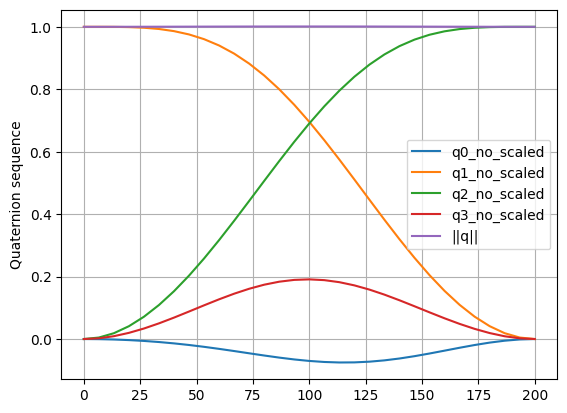

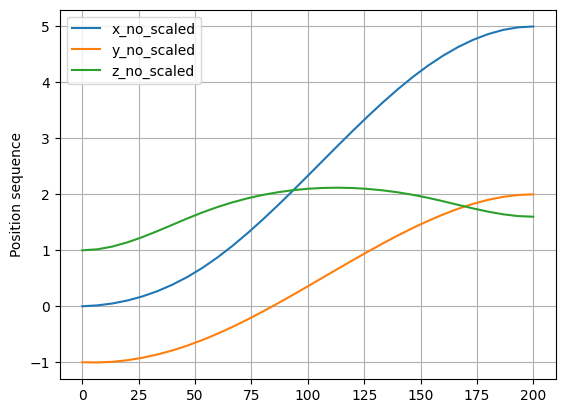

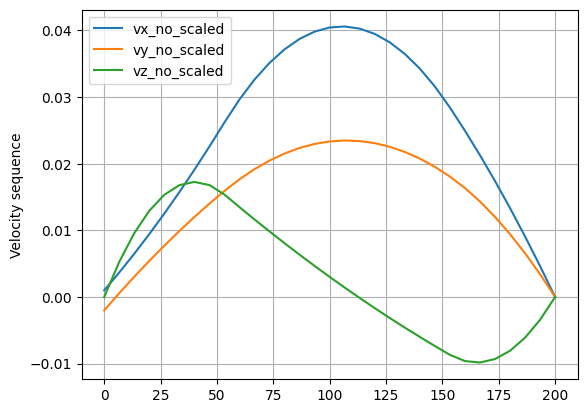

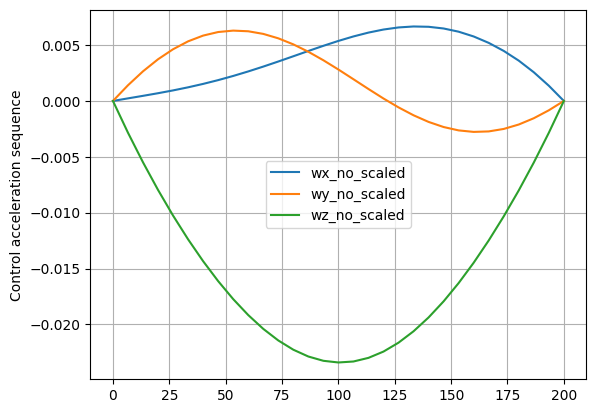

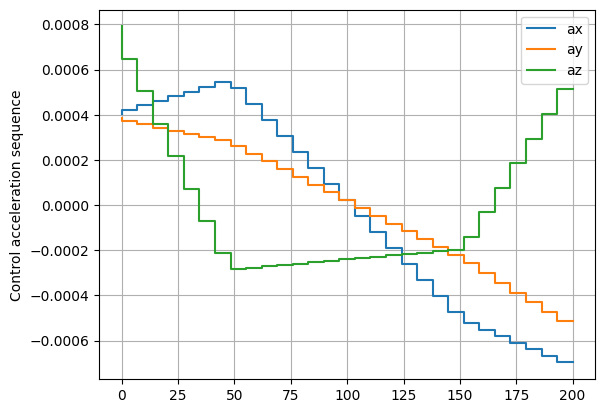

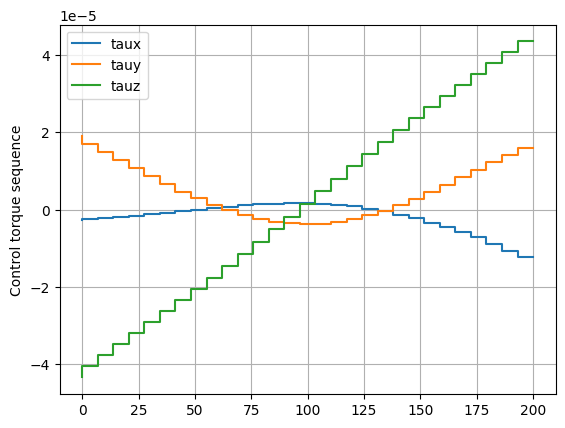

In [19]:
# Plot (scaled initial trajectories)
def global_inv_scaling(x,S,c,T):
    for i in range(0,T,1):
        x[:,i:i+1]=S@x[:,i:i+1]+c
    return x

#Uncomment if there is no optimal solution (or keyboard interruption)

#x_value=global_inv_scaling(np.copy(ox),S_x_scaling_double,c_x_scaling_double,T+1)
#u_value=global_inv_scaling(np.copy(ou),S_u_scaling_double,c_u_scaling_double,T)

x_value=global_inv_scaling(np.copy(x_global),S_x_scaling_double,c_x_scaling_double,T+1)
u_value=global_inv_scaling(np.copy(u_global),S_u_scaling_double,c_u_scaling_double,T)

plt.figure(1)
plt.plot(np.linspace(0, tf, T+1), x_value[6,:], label='q0_no_scaled')
plt.plot(np.linspace(0, tf, T+1), x_value[7,:], label='q1_no_scaled')
plt.plot(np.linspace(0, tf, T+1), x_value[8,:], label='q2_no_scaled')
plt.plot(np.linspace(0, tf, T+1), x_value[9,:], label='q3_no_scaled')
plt.plot(np.linspace(0, tf, T+1), np.linalg.norm(x_value[6:10,:],axis=0), label='||q||')
plt.ylabel('Quaternion sequence')
plt.gca().tick_params(labelsize=10)
plt.legend()
plt.grid(True)

plt.figure(2)
plt.plot(np.linspace(0, tf, T+1), x_value[0,:], label='x_no_scaled')
plt.plot(np.linspace(0, tf, T+1), x_value[1,:], label='y_no_scaled')
plt.plot(np.linspace(0, tf, T+1), x_value[2,:], label='z_no_scaled')

plt.ylabel('Position sequence')
plt.gca().tick_params(labelsize=10)
plt.legend()
plt.grid(True)

plt.figure(3)
plt.plot(np.linspace(0, tf, T+1), x_value[3,:], label='vx_no_scaled')
plt.plot(np.linspace(0, tf, T+1), x_value[4,:], label='vy_no_scaled')
plt.plot(np.linspace(0, tf, T+1), x_value[5,:], label='vz_no_scaled')

plt.ylabel('Velocity sequence')
plt.gca().tick_params(labelsize=10)
plt.legend()
plt.grid(True)

plt.figure(4)
plt.plot(np.linspace(0, tf, T+1), x_value[10,:], label='wx_no_scaled')
plt.plot(np.linspace(0, tf, T+1), x_value[11,:], label='wy_no_scaled')
plt.plot(np.linspace(0, tf, T+1), x_value[12,:], label='wz_no_scaled')

plt.ylabel('Control acceleration sequence')
plt.gca().tick_params(labelsize=10)
plt.legend()
plt.grid(True)

plt.figure(5)
plt.step(np.linspace(0, tf, T), u_value[0,:], label='ax')
plt.step(np.linspace(0, tf, T), u_value[1,:], label='ay')
plt.step(np.linspace(0, tf, T), u_value[2,:], label='az')

plt.ylabel('Control acceleration sequence')
plt.gca().tick_params(labelsize=10)
plt.legend()
plt.grid(True)

plt.figure(6)
plt.step(np.linspace(0, tf, T), u_value[3,:], label='taux')
plt.step(np.linspace(0, tf, T), u_value[4,:], label='tauy')
plt.step(np.linspace(0, tf, T), u_value[5,:], label='tauz')

plt.ylabel('Control torque sequence')
plt.gca().tick_params(labelsize=10)
plt.legend()
plt.grid(True)

In [21]:
import numpy as np
import plotly.graph_objs as go
from scipy.spatial.transform import Rotation as R

def create_cube(center, size, quaternion):
    """Creates a rotated cube using a quaternion."""
    half = size / 2.0
    vertices = np.array([  # Cube vertices
        [-half, -half, -half], [half, -half, -half], [half, half, -half], [-half, half, -half],
        [-half, -half, half], [half, -half, half], [half, half, half], [-half, half, half]
    ])

    # Apply rotation using quaternion
    r = R.from_quat(quaternion)
    rotated_vertices = r.apply(vertices) + center

    # Cube faces (each face as a set of 4 vertices)
    faces = [
        [0, 1, 2, 3], [4, 5, 6, 7], [0, 1, 5, 4],
        [2, 3, 7, 6], [0, 3, 7, 4], [1, 2, 6, 5]
    ]

    # Define mesh faces for the cube
    i_faces = [face[0] for face in faces]
    j_faces = [face[1] for face in faces]
    k_faces = [face[2] for face in faces]
    i_faces += [face[0] for face in faces]
    j_faces += [face[2] for face in faces]
    k_faces += [face[3] for face in faces]

    # Mesh3d for the cube (white cube)
    cube = go.Mesh3d(
        x=rotated_vertices[:, 0], y=rotated_vertices[:, 1], z=rotated_vertices[:, 2],
        i=i_faces, j=j_faces, k=k_faces, opacity=1.0, color='white'
    )

    # Create "eyes" (small blue circles) on the cube's faces
    eye_radius = 0.1
    eye_positions = [
        [half,0.13,0], [half,-0.13,0]
    ]

    # Apply rotation to eye positions
    rotated_eye_positions = r.apply(eye_positions) + center

    eye_spheres = []
    for pos in rotated_eye_positions:
        u, v = np.mgrid[0:2*np.pi:10j, 0:np.pi:5j]
        x_eye = eye_radius * np.cos(u) * np.sin(v) + pos[0]
        y_eye = eye_radius * np.sin(u) * np.sin(v) + pos[1]
        z_eye = eye_radius * np.cos(v) + pos[2]

        # Crear una matriz de color uniforme (por ejemplo, azul con un solo valor)
        color_value = np.full_like(x_eye, 0.5)  # 0.5 es un tono de azul en la escala

        eye_spheres.append(go.Surface(
            x=x_eye, y=y_eye, z=z_eye, surfacecolor=color_value,
            colorscale=[[0, 'deepskyblue'], [1, 'deepskyblue']], opacity=1.0, showscale=False
        ))

    return cube, eye_spheres

def create_spheres(spheres):
    """Creates spheres as surfaces."""
    sphere_traces = []
    for sphere in spheres:
        h, rc = sphere['h'], sphere['rc']
        u, v = np.mgrid[0:2*np.pi:16j, 0:np.pi:8j]
        x_sphere = rc * np.cos(u) * np.sin(v) + h[0]
        y_sphere = rc * np.sin(u) * np.sin(v) + h[1]
        z_sphere = rc * np.cos(v) + h[2]
        sphere_traces.append(go.Surface(
            x=x_sphere, y=y_sphere, z=z_sphere, colorscale='Reds', opacity=0.3, showscale=False
        ))
    return sphere_traces

def plot_3d_trajectory_with_cube(x_value, spheres):
    quaternions = x_value[6:10, :]
    x_traj, y_traj, z_traj = x_value[0, :], x_value[1, :], x_value[2, :]

    trace_trajectory = go.Scatter3d(x=x_traj, y=y_traj, z=z_traj, mode='lines',
                                    line=dict(color='blue', width=2))

    # Set axis limits with uniform scaling
    padding = 0.5
    max_range = max(max(x_traj) - min(x_traj), max(y_traj) - min(y_traj), max(z_traj) - min(z_traj)) / 2
    mid_x, mid_y, mid_z = (max(x_traj) + min(x_traj)) / 2, (max(y_traj) + min(y_traj)) / 2, (max(z_traj) + min(z_traj)) / 2
    x_range = [mid_x - max_range - padding, mid_x + max_range + padding]
    y_range = [mid_y - max_range - padding, mid_y + max_range + padding]
    z_range = [mid_z - max_range - padding, mid_z + max_range + padding]

    # Initial cube (white with blue eyes)
    cube, eye_spheres = create_cube([x_traj[0], y_traj[0], z_traj[0]], 0.5, quaternions[:, 0])

    # Initial spheres
    sphere_traces = create_spheres(spheres)

    # Animation frames
    frames = [
        go.Frame(data=[
            go.Scatter3d(x=x_traj, y=y_traj, z=z_traj, mode='lines',
                         marker=dict(size=2, color='blue')),
            create_cube([x_traj[k], y_traj[k], z_traj[k]], 0.5, quaternions[:, k])[0],
        ] + create_spheres(spheres) + create_cube([x_traj[k], y_traj[k], z_traj[k]], 0.5, quaternions[:, k])[1])
        for k in range(len(x_traj))
    ]

    layout = go.Layout(
        title='Astrobee guidance COGU (SCVx, ECOS)',
        scene=dict(
            xaxis_title='x', yaxis_title='y', zaxis_title='z',
            xaxis=dict(range=x_range, autorange=False),
            yaxis=dict(range=y_range, autorange=False),
            zaxis=dict(range=z_range, autorange=False),
            aspectmode='cube',  # Ensures correct proportions
            camera=dict(eye=dict(x=1.5, y=1.5, z=1.5))  # Adjust camera view for better visibility
        ),
        updatemenus=[dict(type='buttons', buttons=[dict(label='Play', method='animate',
                                                       args=[None, dict(frame=dict(duration=50, redraw=True),
                                                                        fromcurrent=True)])])])

    fig = go.Figure(data=[trace_trajectory, cube] + sphere_traces + eye_spheres, layout=layout, frames=frames)
    fig.show()

spheres = [
    {'h': c_obs1_double, 'rc': d_obs1_double},
    {'h': c_obs2_double, 'rc': d_obs2_double},
    {'h': c_obs3_double, 'rc': d_obs3_double}
]

plot_3d_trajectory_with_cube(x_value, spheres)